In [25]:
import numpy as np
from scipy import ndimage
import os
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
def find_connected_components(volume, structure):
    """Label connected components in a 3D binary volume."""
    labeled_volume, num_components = ndimage.label(volume, structure=structure)  # Label each connected component
    return labeled_volume, num_components

In [5]:
# load data (FIP)
labels = pd.read_csv('/neurospin/dico/data/deep_folding/current/datasets/hcp/FIP/FIP_labels.csv')
skeletons = np.load('/neurospin/dico/data/deep_folding/current/datasets/hcp/crops/2mm/F.I.P./mask/Rskeleton.npy')
skeleton_labels = pd.read_csv('/neurospin/dico/data/deep_folding/current/datasets/hcp/crops/2mm/F.I.P./mask/Rskeleton_subject.csv')

In [10]:
fip_subs = labels['Subject'].tolist()
fip_subs_idxs = skeleton_labels.loc[skeleton_labels['Subject'].isin(fip_subs)].index.tolist()

In [22]:
structure = np.ones((3,3,3))
cc_lengths = []

for idx in fip_subs_idxs:
    skel = skeletons[idx,:,:,:,0]
    labeled_volume, num_components = find_connected_components(skel, structure=structure)
    cc_sizes = list(np.unique(labeled_volume, return_counts=True)[1])
    cc_sizes.sort()
    cc_lengths.append(cc_sizes)

In [38]:
feature = np.array([l[-3:-1] for l in cc_lengths])
label = labels['Right_FIP'].tolist()

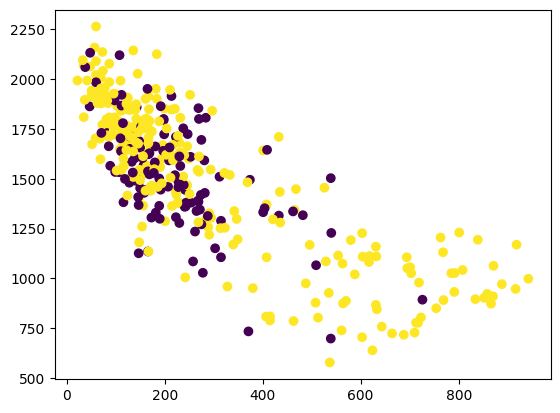

In [39]:
plt.scatter(feature[:,0], feature[:,1], c=label)

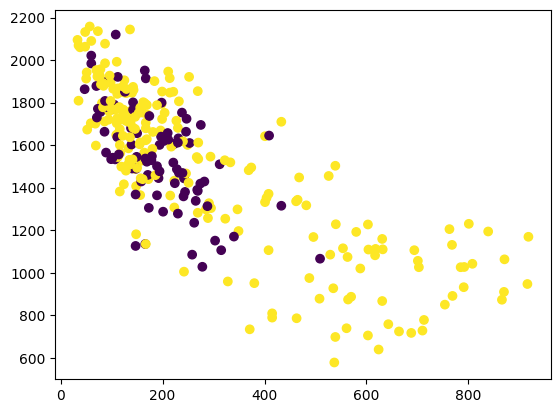

In [54]:
## use predicted labels instead of true labels
dir_model = '/neurospin/dico/jlaval/Output/test_distmaps/FIP_right_UKB40/lr4e-4_binarize20_alpha05/FIP_right_custom_embeddings/Right_FIP/test_predicted_probas.csv'
label_pred = pd.read_csv(dir_model, usecols=['Subject', 'mean_pred'])
fip_subs = label_pred['Subject'].tolist()
label_pred = label_pred['mean_pred'].tolist()
fip_subs_idxs = skeleton_labels.loc[skeleton_labels['Subject'].isin(fip_subs)].index.tolist()

structure = np.ones((3,3,3))
cc_lengths = []

for idx in fip_subs_idxs:
    skel = skeletons[idx,:,:,:,0]
    labeled_volume, num_components = find_connected_components(skel, structure=structure)
    cc_sizes = list(np.unique(labeled_volume, return_counts=True)[1])
    cc_sizes.sort()
    cc_lengths.append(cc_sizes)

feature = np.array([l[-3:-1] for l in cc_lengths])

plt.scatter(feature[:,0], feature[:,1], c=np.array(label_pred)>0.5)

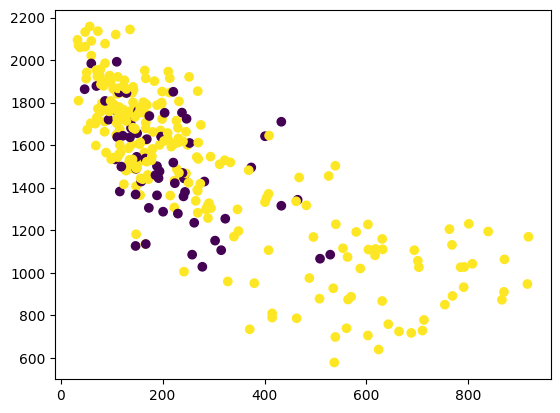

In [55]:
## use predicted labels instead of true labels
dir_model = '/neurospin/dico/jlaval/Output/test_distmaps/FIP_right_UKB40/lr4e-4_binarize0_alpha05/FIP_right_custom_embeddings/Right_FIP/test_predicted_probas.csv'
label_pred = pd.read_csv(dir_model, usecols=['Subject', 'mean_pred'])
fip_subs = label_pred['Subject'].tolist()
label_pred = label_pred['mean_pred'].tolist()
fip_subs_idxs = skeleton_labels.loc[skeleton_labels['Subject'].isin(fip_subs)].index.tolist()

structure = np.ones((3,3,3))
cc_lengths = []

for idx in fip_subs_idxs:
    skel = skeletons[idx,:,:,:,0]
    labeled_volume, num_components = find_connected_components(skel, structure=structure)
    cc_sizes = list(np.unique(labeled_volume, return_counts=True)[1])
    cc_sizes.sort()
    cc_lengths.append(cc_sizes)

feature = np.array([l[-3:-1] for l in cc_lengths])

plt.scatter(feature[:,0], feature[:,1], c=np.array(label_pred)>0.5)

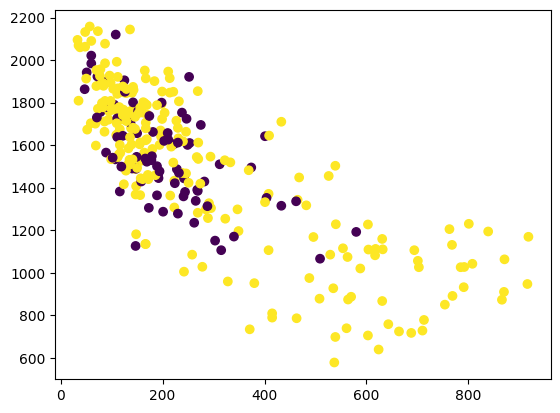

In [56]:
## use predicted labels instead of true labels
dir_model = '/neurospin/dico/jlaval/Output/ablation_2_models/10_cutin_translation_3/FIP_right_UKB40/14_cutin_size_30_50_p80_bottom50name14-31-28_225/FIP_right_custom_embeddings/Right_FIP/test_predicted_probas.csv'
label_pred = pd.read_csv(dir_model, usecols=['Subject', 'mean_pred'])
fip_subs = label_pred['Subject'].tolist()
label_pred = label_pred['mean_pred'].tolist()
fip_subs_idxs = skeleton_labels.loc[skeleton_labels['Subject'].isin(fip_subs)].index.tolist()

structure = np.ones((3,3,3))
cc_lengths = []

for idx in fip_subs_idxs:
    skel = skeletons[idx,:,:,:,0]
    labeled_volume, num_components = find_connected_components(skel, structure=structure)
    cc_sizes = list(np.unique(labeled_volume, return_counts=True)[1])
    cc_sizes.sort()
    cc_lengths.append(cc_sizes)

feature = np.array([l[-3:-1] for l in cc_lengths])

plt.scatter(feature[:,0], feature[:,1], c=np.array(label_pred)>0.5)